LIBRARIES

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import pickle

In [2]:
df=pd.read_csv('../Data/clean_FB.csv') # read the data
print(df.head())

                         Time  Protocol  Length        DT  source port  \
0  2021-12-12 19:24:54.113588        10      66  0.147364        443.0   
1  2021-12-12 19:24:54.215187        12     281  0.101599        443.0   
2  2021-12-12 19:24:57.467081        10      66  0.151991        443.0   
3  2021-12-12 19:24:57.629709        12     283  0.162628        443.0   
4  2021-12-12 19:24:58.846692        10      66  0.011171        443.0   

     Absolute Time  Cumulative Bytes  
0  00:24:54.113588               894  
1  00:24:54.215187              1175  
2  00:24:57.467081              1727  
3  00:24:57.629709              2010  
4  00:24:58.846692              2336  


ALGORITHM

In [3]:
X=df[['Protocol','Length','DT','Cumulative Bytes']].values # Features 
y=df['source port'].values # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) # 20% test data


Coefficients:  [-7.43428963e+01 -2.84336292e+01  8.80197209e+03  1.01472922e-05]
Variance score: 0.9312419226699407


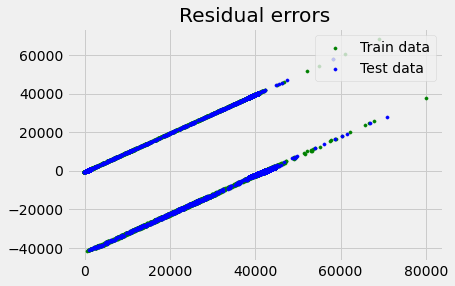

In [4]:
# create linear regression object
reg = linear_model.LinearRegression()

# train the model using the training sets
reg.fit(X_train, y_train)

# regression coefficients
print('Coefficients: ', reg.coef_)

# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))

# plot for residual error

## setting plot style
plt.style.use('fivethirtyeight')

## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
			color = "green", s = 10, label = 'Train data')

## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
			color = "blue", s = 10, label = 'Test data')

## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)

## plotting legend
plt.legend(loc = 'upper right')

## plot title
plt.title("Residual errors")

## method call for showing the plot
plt.show()


SAVING MODEL

In [5]:
filename = 'LinearRegression.sav' 
pickle.dump(reg , open(filename, 'wb')) # Save the model

In [6]:
df4=pd.read_csv('../Data/Youtube.csv')
df4.drop('No.',axis=1,inplace=True)
label_encoder = preprocessing.LabelEncoder()
df4=df4[~df4['source port'].isnull()].copy()
df4.isnull().sum()
df4['Protocol']=label_encoder.fit_transform(df4['Protocol'])
print(df4.head())

                         Time  Protocol  Length        DT  source port  \
0  2021-12-12 18:49:13.901896         0      83  0.000000      46267.0   
1  2021-12-12 18:49:13.919080         0      99  0.017184         53.0   
2  2021-12-12 18:49:13.932882         5    1392  0.013802      44589.0   
3  2021-12-12 18:49:13.976489         5      84  0.043607        443.0   
4  2021-12-12 18:49:14.185215         5    1392  0.208726        443.0   

     Absolute Time  Cumulative Bytes  Frequency  TX Delay  Relative Time  \
0  23:49:13.901896                83        NaN       NaN       0.000000   
1  23:49:13.919080               182        NaN       NaN       0.017184   
2  23:49:13.932882              1574        NaN       NaN       0.030986   
3  23:49:13.976489              1658        NaN       NaN       0.074593   
4  23:49:14.185215              3050        NaN       NaN       0.283319   

                                          New Column  
0    Standard query 0xd353 A youtubei.googl

In [7]:
X2=df4[['Protocol','Length','DT','Cumulative Bytes']].values
loaded_model = pickle.load(open(filename, 'rb')) # Load the model 
result = loaded_model.predict(X2)

In [8]:
df4['Predict'] = result # Add the predicted data to the dataframe